# Examen Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_ArellanoCarlos*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

---
# Primer punto. Optimización de funciones con `SymPy` (34 puntos)

**Volumen máximo**. Considere un cono circular recto inscrito en una esfera de radio $r$:

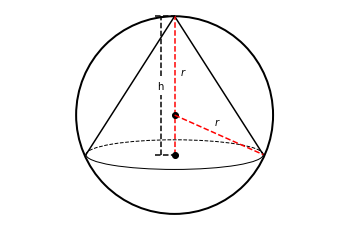

In [80]:
import numpy as np
import sympy as sp

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

B1 = patches.Arc((0, -0.4), 1.8,0.3,theta2=180,fc='None',ls='--',color='k')
B2 = patches.Arc((0, -0.4), 1.8,0.3,theta1=180,fc='None',color='k')
C = patches.Circle((0, 0), 1,fc='None',lw=2,color='k');
ax = plt.gca()
ax.add_artist(B1)
ax.add_artist(B2)
ax.add_artist(C)

plt.plot([0.9,0,-0.9],[-0.4,1,-0.4],'k')
plt.plot([0,0],[-0.4,1],'--r')
plt.plot([0,0],[-0.4,0],'ok')
plt.plot([0,0.9],[0,-0.4],'--r')
plt.plot([-0.2,0],[-0.4,-0.4],'--k')
plt.plot([-0.2,0],[1,1],'--k')
plt.plot([-0.14,-0.14],[-0.4,0.2],'--k')
plt.plot([-0.14,-0.14],[0.4,1],'--k')

plt.text(-0.18,0.26,'h')
plt.text(0.4,-0.1,'$r$')
plt.text(0.05,0.4,'$r$')

plt.axis([-1.7,1.7,-1.1,1.1])
plt.axis('off')
plt.show()

1. Escriba el volumen $V$ del cono como una función de la altura $h$ de éste. Realice este punto usando fórmulas de $\LaTeX$, en celdas *Markdown*. (14 puntos)
2. Determinar el valor de $h$ que maximiza el volumen para un radio $r=2$. (10 puntos)
3. ¿Cuál es el volumen máximo del cono? (10 puntos)

$$ V = \frac{1}{3}\pi r^2h $$

Teniendo en cuenta el teorema de la altura y que son triangulos semejantes ya que tienen el mismo angulo, podemos decir que:
$$ \frac{h}{r} = \frac{r}{2R-h} $$
Donde ''R'' viene siendo el radio del cono, entonces para dejar la formula en funcion de h, haremos:
$$ r^2 = h(2R-h) $$
Ahora, sustituyendo $ r^2 $ en la funcion de volumen:
$$ V = \frac{1}{3}\pi h^2(2R-h) $$

In [81]:
h = sp.var("h")
R = sp.var("R")

def V(h) :
    return (1/3)*(sp.pi*h**2)*(2*R - h)

V(h)

0.333333333333333*pi*h**2*(2*R - h)

In [82]:
#Calculando la primera derivada
dvh = sp.diff(V(h), h)
dvh

-0.333333333333333*pi*h**2 + 0.666666666666667*pi*h*(2*R - h)

In [83]:
#Resolviendo para punto critico igualando a 0
pcvh = sp.solve(dvh, h)
pcvh

[0.0, 1.33333333333333*R]

Esto nos dice que el punto critico se encuentra en 1.33*R, osea cuando $ h = 1.3333R $

Teniendo en cuenta eso deberemos de declarar la ecuacion de $ r^2 $, para asi poder sustituir el valor de h y saber el valor
que maximiza el volumen cuando el $ r = 2 $

In [84]:
#Entonces sustituyendo el valor obtenido en pcvh el punto critico en h en r(h)

def pcvhR(h) :
    return 1.3333*R

def r(h) :
    return pcvhR(h)*(2*R - pcvhR(h))-2**2
r(h)

0.88891111*R**2 - 4

teniendo que $ 0.88891111R^2-4 $
resolveremos para R 

In [85]:
res = sp.solve(r(h), R)

res

[-2.12129382887830, 2.12129382887830]

In [86]:
#Tomamos solo el valor posiitvo 
res[1]

2.12129382887830

In [87]:
#Ahora calculando el valor de h para maximizar con radio de 2

h = (1.3333*R).subs(R, res[1])
h

2.82832106204343

In [88]:
#Ahora calculando el volumen maximo
def Vol(h) :
    return (1/3)*(sp.pi*h*4)

Vol(h)

3.77109474939125*pi

# Segundo punto. Programación lineal (33 puntos)

Una compañia de aceros produce dos tamaños de tubos: A, B que son vendidos, respectivamente en 10u.m. y 9u.m. por metro. Para fabricar cada metro del tubo A se requieren 0.5 minutos de tiempo de procesamiento sobre un tipo particular de maquina de modelado y cada metro del tubo B requiere 0.6 minutos. Después de la producción, cada metro de tubo, sin importar el tipo requiere 1 onza de material de soldar. El costo total se estima en 3u.m. y 4u.m. por metro de los tubos respectivamente. Para la siguiente semana, la compañía ha recibido pedidos excepcionalmente grandes que totalizan 2000 metros del tubo A y 5000 metros del tubo B. como solo se dispone de 30 horas de tiempo de maquina esta semana y solo se tienen en inventario 3500 onzas de material de soldar, el departamento de producción no podrá satisfacer esta demanda. Como no se espera que continúe esta demanda tan alta, la gerencia esta considerando la compra de algunos de estos tubos a proveedores de Japón a un costo de entrega de 6u.m. por metro del tubo A y 7u.m. por metro del tubo B.

Se desea conocer la cantidad de producción de cada tipo de tubo y la cantidad de compra a Japón para satisfacer la demanda y **maximizar** las ganancias de la compañía (esto es, precio de venta menos costos). La siguiente tabla presenta la información correspondiente.

<table>
  <tr>
      <th>Tubo</th>
      <th>Precio de venta</th>
      <th>Demanda</th>
      <th>Tiempo de máquina</th>
      <th>Material para soldar</th>
      <th>Costo de producción</th>
      <th>Costo de compra</th>
  </tr>
  <tr>
      <th>Tipo A</th>
      <td>10</td>
      <td>2000</td>
      <td>0.5 min</td>
      <td>1 oz/m</td>
      <td>3</td>
      <td>6</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Tipo B</th>
      <td>9</td>
      <td>5000</td>
      <td>0.6 min</td>
      <td>1 oz/m</td>
      <td>4</td>
      <td>7</td>
  </tr>
  <tr>
      <td>Disponibilidad</td>
      <td></td>
      <td></td>
      <td>30 horas</td>
      <td>3500 oz</td>
      <td></td>
      <td></td>
  </tr>
</table>

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}
2. Resuelva el problema utilizando la función `linprog`. ¿Cuántos tubos de cada tipo se deben producir?, ¿Cuántos se deben comprar?, ¿Cuál es la ganancia? (10 puntos)

La función objetivo será:

$$ \min_{x_1,\dots,x_4}-7x_1 - 5x_2 - 4x_3 - 2x_4 $$

Donde:
- $ x_1 $ = tubo tipo A antes de la demanda 
- $ x_2 $ = tubo tipo B antes de la demanda 
- $ x_3 $ = tubo tipo A despues de la demanda 
- $ x_4 $ = tubo tipo B despues de la demanda 

Ahora tenemos las restricciones:

Tenemos la restriccion de los minutos de fabricacion para los tubos tipo A y B
- $ 0.5x_1 + 0.6x_2 \leq 1800$

Tenemos la restriccion del material de produccion para los tubos de tipo A y B
- $ x_1 + x_2 \leq 3500 $

Tenemos las restricciones de produccion de tubos tipo A y B antes de la demanda
- $ x_1 + x_3 \leq 2000$
- $ x_2 + x_4 \leq 5000$

Tenemos las restricciones de produccion de tubos tipo A y B despues de la demanda
- $ x_1 + x_3 \geq 2000$
- $ x_2 + x_4 \geq 5000$

De manera reescrita

- $\boldsymbol{c}=\left[-7 \quad -5 \quad -4 \quad -2 \right]^\top$,
- $\boldsymbol{A}=\left[\begin{array}{cc}0.5 & 0.6 & 0 & 0 \\ 1 & 1 & 0 & 0 & \\ 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ -1 & 0 & -1 & 0 \\ 0 & -1 & 0 & -1\end{array}\right]$
- $\boldsymbol{b}=\left[1800 \quad 3500 \quad 2000 \quad 5000 \quad -2000 \quad -5000\right]^\top$

In [93]:
import numpy as np
import scipy.optimize as opt

In [100]:
c = np.array([-7, -5, -4, -2])
A = np.array([[0.5, 0.6, 0, 0],
              [1, 1, 0, 0],
              [1, 0, 1, 0], 
              [0, 1, 0, 1],
              [-1, 0, -1, 0],
              [0, -1, 0, -1]]) 
b = np.array([1800, 3500, 2000, 5000, -2000, -5000])

opt.linprog(c, A, b, method="simplex")

     con: array([], dtype=float64)
     fun: -28000.0
 message: 'Optimization terminated successfully.'
     nit: 9
   slack: array([  0.        , 166.66666667,   0.        ,   0.        ,
         0.        ,   0.        ])
  status: 0
 success: True
       x: array([2000.        , 1333.33333333,    0.        , 3666.66666667])

###### Teniendo en cuenta los resultados en x:

- Se deben producir 2000 tubos tipo A
- Se deben producir 1333 tubos tipo B
- Se deben comprar 0 tubos tipo A
- Se deben comprar 3667 tubos tipo B

## Calculando la ganancia
Sabiendo que el total de ventas de los tubos de tipo A y B es de $65,000, restandole los gastos de produccion y de compra
tendremos las ganancias

In [101]:
vt = 2000*10 + 5000*9
vt

65000

In [104]:
gpc = 2000*3 + 1333.3333*4 + 3666.6666*7
gpc

36999.9994

In [107]:
Ganancia_total = vt - gpc
Ganancia_total

28000.0006